# Commencement Du Projet

## Importations 

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



Nous débutons notre projet en important notre jeu de données depuis le fichier CSV ‘cardio_train.csv’ dans un DataFrame Pandas nommé df :

In [77]:
df = pd.read_csv('cardio_train.csv', sep=';')

C’est notre point de départ pour l’analyse des données.






Ensuite, nous examinons les informations générales de notre DataFrame en utilisant la méthode df.info(). Cela nous donne un aperçu des types de données et du nombre d’entrées non nulles pour chaque colonne :



In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Notre DataFrame contient 70 000 entrées et 13 colonnes. Chaque colonne représente une caractéristique différente, et toutes les colonnes ont des valeurs non nulles, ce qui signifie qu’il n’y a pas de valeurs manquantes dans notre jeu de données. Les colonnes sont les suivantes :

1. id : Identifiant unique du patient.
2. age : Âge du patient.
3. gender : Sexe du patient.
4. height : Taille du patient.
5. weight : Poids du patient.
6. ap_hi : Tension artérielle systolique.
7. ap_lo : Pression sanguine diastolique.
8. cholesterol : Taux de cholestérol.
9. gluc : Taux de glucose.
10. smoke : Si le patient est fumeur ou non.
11. alco : Si le patient consomme de l’alcool ou non.
12. active : Si le patient est physiquement actif ou non.
13. cardio : Si le patient a un risque cardiovasculaire ou non.

La majorité des colonnes sont de type int64, à l’exception de weight qui est de type float64. La taille en mémoire de notre DataFrame est de 6.9 MB. Cette information nous aide à comprendre la structure de nos données et à planifier les prochaines étapes de notre analyse.

In [79]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Nettoyage et préparations des données 

Maintenant, nous passons à l’étape de nettoyage et de préparation des données. Cette étape est cruciale pour garantir la qualité de nos analyses et de nos modèles de machine learning. Voici comment nous procédons :

    1. Suppression de colonnes inutiles : Nous commençons par supprimer la colonne ‘id’ qui n’apporte pas d’information utile pour notre analyse.


    2. Suppression des doublons : Nous supprimons ensuite les lignes en double pour éviter toute redondance dans notre jeu de données.

In [80]:
df.drop_duplicates(inplace=True)

    3. Suppression des valeurs manquantes : Nous supprimons les lignes contenant des valeurs manquantes pour garantir la cohérence de nos données.

In [81]:
df.dropna(inplace=True)

    4. Vérification des données : Enfin, nous vérifions les premières lignes de notre DataFrame et nous assurons qu’il ne reste plus de valeurs manquantes.

In [82]:
df.head()

print("Missing values in each column:")
print(df.isnull().sum())
df.info()

Missing values in each column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int6

Après avoir nettoyé et préparé nos données, nous obtenons un DataFrame contenant 69 976 entrées et 12 colonnes. 

## Visualisation Des données

## Analyse exploratoire

Maintenant que nos données sont propres et prêtes, nous entamons la phase d’analyse exploratoire des données.

Nous commençons par visualiser la corrélation entre les différentes variables de notre jeu de données à l’aide d’une matrice de corrélation. 

Cette visualisation nous aidera à comprendre les relations entre les différentes variables et à identifier les variables qui ont le plus d’impact sur le risque cardiovasculaire. Voici comment cela se présente en code :

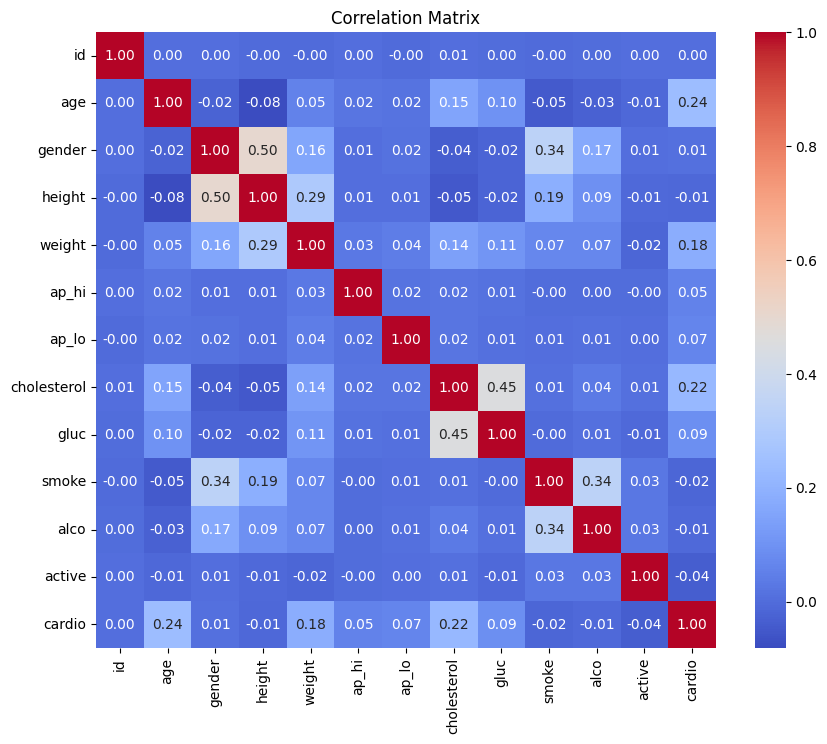

In [83]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
##corr = df.drop('age_group', axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


D’après la matrice de corrélation affichée, nous pouvons observer les relations entre les différentes variables de notre jeu de données. Les valeurs proches de 1 ou -1 indiquent une forte corrélation positive ou négative, respectivement, tandis que les valeurs proches de 0 indiquent une faible corrélation.

Voici quelques observations clés :

age et cardio semblent avoir une corrélation positive modérée, ce qui signifie que le risque cardiovasculaire peut augmenter avec l’âge.

cholesterol et gluc ont également une corrélation positive modérée, suggérant que les niveaux de cholestérol et de glucose dans le sang peuvent être liés.

smoke et alco présentent une corrélation positive, ce qui pourrait indiquer que les personnes qui fument sont également plus susceptibles de consommer de l’alcool.

height et gender ont une corrélation négative, ce qui pourrait suggérer une différence de taille moyenne entre les sexes dans notre jeu de données.

Maintenant, nous allons passer à une autre étape importante de notre analyse exploratoire des données : la visualisation des boxplots pour chaque variable. Les boxplots nous permettent de comprendre la distribution de nos données, d’identifier les valeurs aberrantes et de voir la dispersion de nos données. Voici comment cela se présente en code :

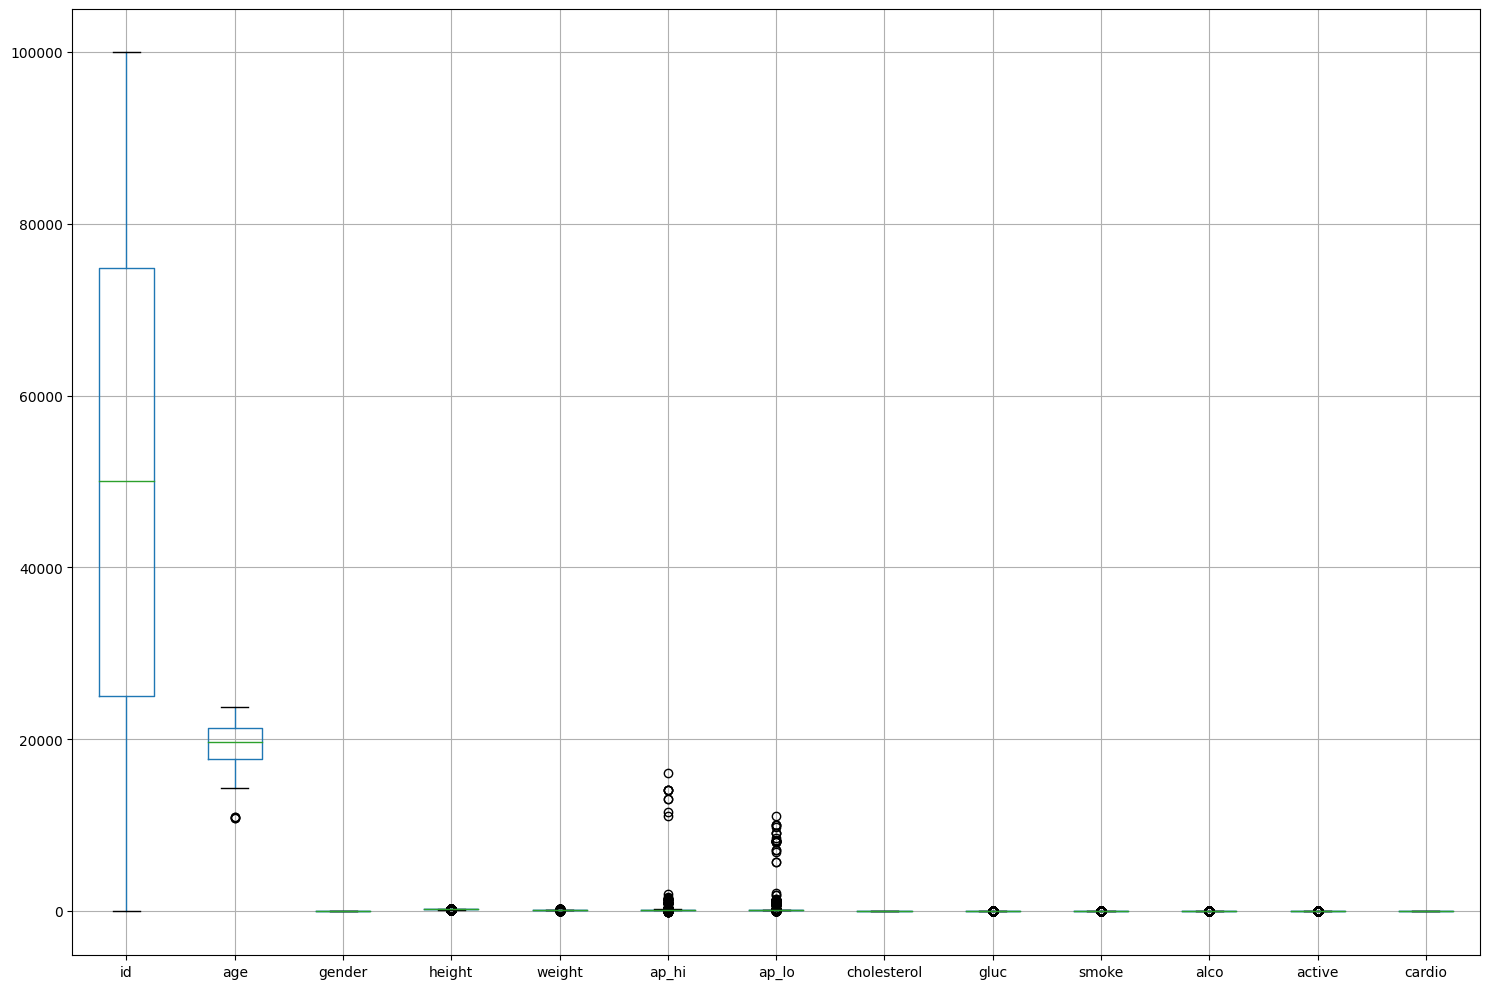

In [84]:
# Boxplots for each variable
df.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

D’après les boxplots affichés pour chaque variable, nous pouvons observer la distribution de nos données. Les boxplots fournissent une représentation visuelle de la médiane, des quartiles et des valeurs aberrantes pour chaque variable.

Voici quelques observations clés :

age, height, weight, ap_hi et ap_lo semblent avoir une distribution assez large, ce qui indique une grande variété de valeurs dans ces variables.
cholesterol, gluc, smoke, alco, active et cardio sont des variables binaires ou catégorielles, donc leurs boxplots se présentent sous forme de lignes horizontales.
Il semble y avoir quelques valeurs aberrantes dans ap_hi, ap_lo et weight, comme indiqué par les points au-dessus et en dessous des boxplots. Ces valeurs aberrantes pourraient être dues à des erreurs de mesure ou de saisie, ou elles pourraient représenter de véritables valeurs extrêmes.

Maintenant, nous allons passer à une étape cruciale de notre analyse : la réduction de la dimensionnalité et la visualisation des distributions. Nous commençons par supprimer les colonnes qui ont une corrélation parfaite (ou presque) avec d’autres, car elles n’apportent pas d’informations supplémentaires à notre modèle.

Ensuite, nous traçons des graphiques de densité pour chaque variable restante pour visualiser leurs distributions. Voici comment cela se présente en code :

     1. Suppression des colonnes avec une seule valeur unique : Nous commençons par supprimer les colonnes qui ont une seule valeur unique, car elles n’apportent pas d’informations utiles à notre modèle.

In [85]:
df = df.loc[:, df.nunique() > 1]

    2. Calcul de la matrice de corrélation : Ensuite, nous calculons la matrice de corrélation pour comprendre les relations entre les différentes variables de notre jeu de données.

In [86]:
corr_matrix = df.corr().abs()

    3. Sélection des colonnes supérieures au seuil de corrélation : Nous sélectionnons ensuite les colonnes qui ont une corrélation supérieure à un certain seuil. Cela nous permet d’identifier les variables qui sont fortement corrélées entre elles.

In [87]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

    4. Suppression des colonnes parfaitement corrélées : Nous supprimons les colonnes qui sont parfaitement corrélées (ou presque) avec d’autres, car elles n’apportent pas d’informations supplémentaires à notre modèle.

In [88]:
df = df.drop(df[to_drop], axis=1)

    5. Tracé des graphiques de densité : Enfin, nous traçons des graphiques de densité pour chaque variable restante pour visualiser leurs distributions.

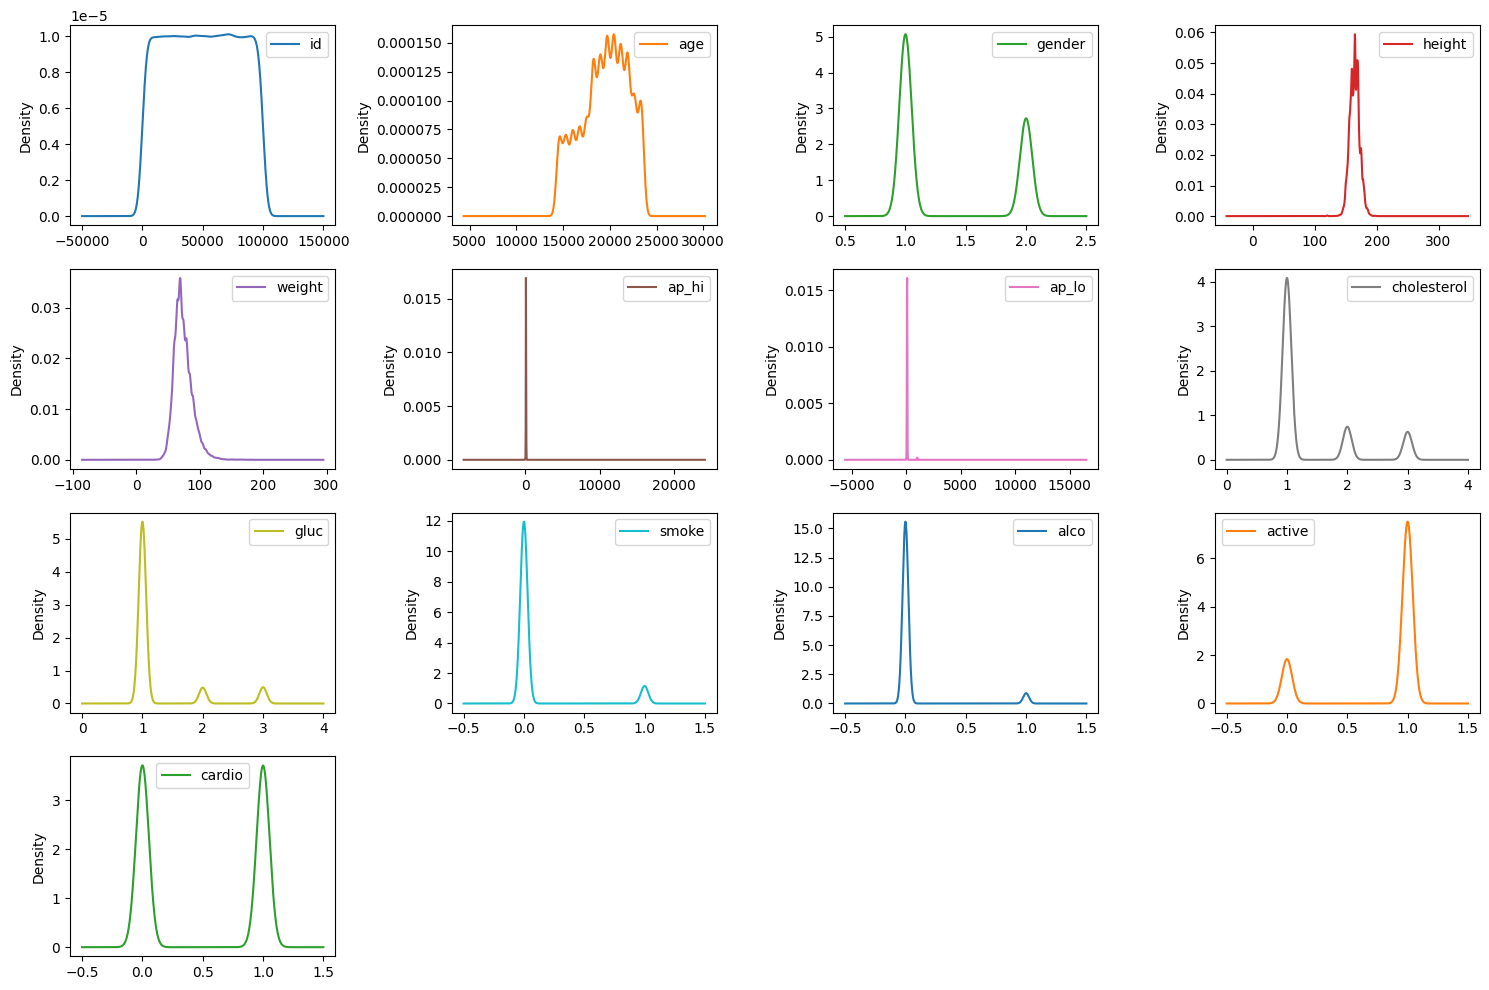

In [89]:
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

D’après les graphiques de densité affichés pour chaque variable, nous pouvons observer la distribution de nos données. Les graphiques de densité fournissent une représentation visuelle de la distribution de probabilité d’une variable continue.

Voici quelques observations clés :

age, height, weight, ap_hi et ap_lo semblent avoir une distribution assez large, ce qui indique une grande variété de valeurs dans ces variables.

cholesterol, gluc, smoke, alco, active et cardio sont des variables binaires ou catégorielles, donc leurs graphiques de densité se présentent sous forme de pics distincts.

Il semble y avoir quelques valeurs aberrantes dans ap_hi, ap_lo et weight, comme indiqué par les longues queues sur les graphiques de densité.

Ces observations nous aideront à mieux comprendre nos données et à identifier les variables qui pourraient avoir le plus d’impact sur notre modèle de régression logistique. Elles nous aideront également à identifier les variables qui pourraient nécessiter une transformation ou un nettoyage supplémentaire avant la modélisation.

Maintenant, nous allons passer l'étape de la création de groupes d’âge et l’analyse de la proportion de personnes atteintes de maladies cardiovasculaires dans chaque groupe d’âge.

    1. Conversion de l’âge de jours en années : Nous commençons par convertir l’âge de jours en années pour faciliter l’interprétation.

In [90]:
df['age'] = df['age'] / 365

    2 Création de groupes d’âge : Ensuite, nous créons des groupes d’âge en utilisant la fonction pd.cut(). Cela nous permet de regrouper les patients en différentes catégories d’âg.

In [91]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 100, 150], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70-100', '100+'])

    3. Tracé de la proportion de personnes atteintes de maladies cardiovasculaires dans chaque groupe d’âge puis, nous traçons un graphique en barres montrant la proportion de personnes atteintes de maladies cardiovasculaires dans chaque groupe d’âge.

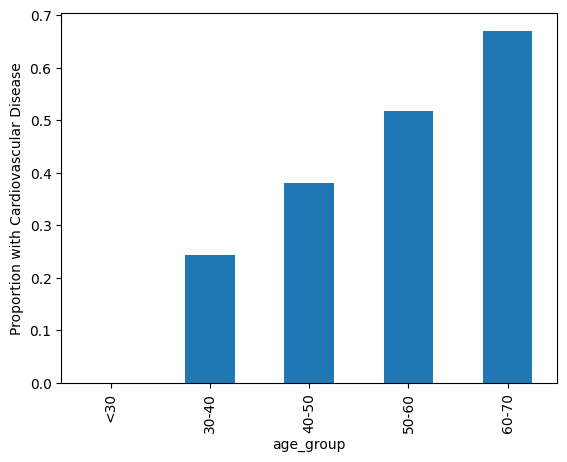

In [92]:
df.groupby('age_group', observed=True)['cardio'].mean().plot(kind='bar')
plt.ylabel('Proportion with Cardiovascular Disease')
plt.show()

D’après le graphique à barres, nous pouvons observer la proportion de personnes atteintes de maladies cardiovasculaires dans chaque groupe d’âge. Voici quelques observations clés :

Le groupe d’âge <30 a la plus faible proportion de personnes atteintes de maladies cardiovasculaires.

La proportion de personnes atteintes de maladies cardiovasculaires augmente avec l’âge. Les groupes d’âge 30-45 et 45-60 ont une proportion plus élevée que le groupe <30.

Le groupe d’âge 60-70 a la plus forte proportion de personnes atteintes de maladies cardiovasculaires.

Ces observations confirment que l’âge est un facteur de risque important pour les maladies cardiovasculaires. Plus une personne est âgée, plus elle est susceptible d’être atteinte de maladies cardiovasculaires. 

Cette information est essentielle pour notre modèle de régression logistique. Elle nous aide à comprendre l’importance de l’âge en tant que variable prédictive dans notre modèle.

Nous allons maintenant passer à une autre étape importante de notre analyse : le calcul de l’indice de masse corporelle (BMI) et la visualisation de sa distribution en fonction de la maladie cardiovasculaire.

    1. Calcul du BMI : Nous commençons par calculer le BMI pour chaque individu dans notre jeu de données. Le BMI est calculé en divisant le poids (en kg) par le carré de la taille (en mètres).

In [93]:
df['bmi'] = df['weight'] / (df['height']/100)**2

    2. Boxplot du BMI par maladie cardiovasculaire : Ensuite, nous traçons un boxplot du BMI en fonction de la présence ou non de maladie cardiovasculaire. Cela nous permet de voir si le BMI a un impact sur la maladie cardiovasculaire.

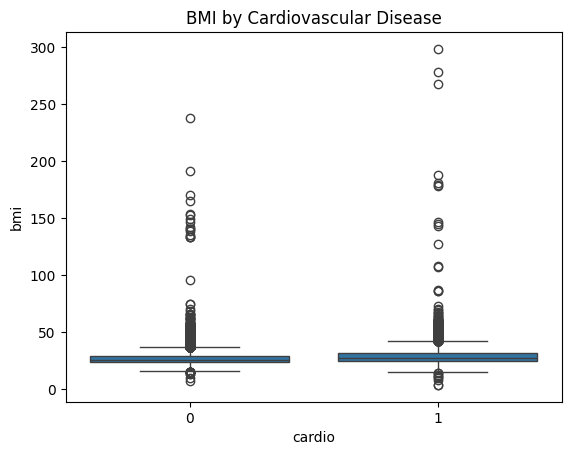

In [94]:
sns.boxplot(data=df, x='cardio', y='bmi')
plt.title('BMI by Cardiovascular Disease')
plt.show()

D’après le boxplot affiché, nous pouvons observer la distribution de l’indice de masse corporelle (BMI) pour les individus avec et sans maladie cardiovasculaire. Voici quelques observations clés :

Pour les individus sans maladie cardiovasculaire (cardio = 0), le BMI semble être légèrement plus bas en général par rapport à ceux avec une maladie cardiovasculaire (cardio = 1).

Il y a une variété de valeurs de BMI pour les deux catégories, comme indiqué par la longueur des boîtes et des moustaches dans le boxplot.

Il semble y avoir quelques valeurs aberrantes dans les deux catégories, comme indiqué par les points au-dessus et en dessous des boxplots. Ces valeurs aberrantes pourraient être dues à des erreurs de mesure ou de saisie, ou elles pourraient représenter de véritables valeurs extrêmes.

Ces observations suggèrent que le BMI pourrait être un facteur important dans la prédiction de la maladie cardiovasculaire. 

    3. Histogramme de la distribution du BMI par maladie cardiovasculaire : Puis, nous traçons un histogramme de la distribution du BMI en fonction de la maladie cardiovasculaire. Cela nous permet de voir comment le BMI varie pour les individus avec et sans maladie cardiovasculaire.

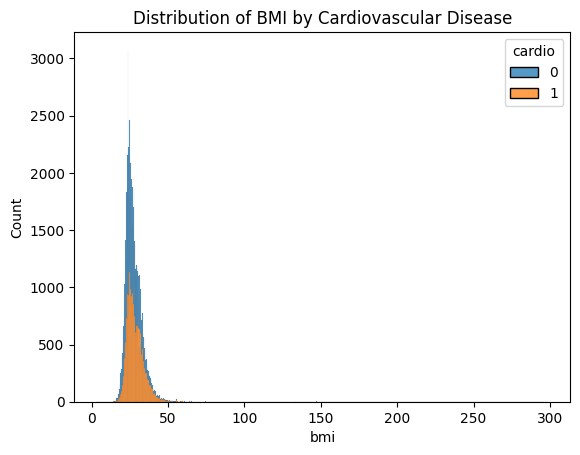

In [95]:
sns.histplot(data=df, x='bmi', hue='cardio', multiple='stack')
plt.title('Distribution of BMI by Cardiovascular Disease')
plt.show()

Les deux distributions semblent se chevaucher considérablement, ce qui suggère que le BMI seul peut ne pas être un bon indicateur de la présence de maladie cardiovasculaire.

Cependant, on peut observer que la distribution des individus avec une maladie cardiovasculaire (en orange) semble légèrement décalée vers la droite par rapport à celle des individus sans maladie cardiovasculaire (en bleu). Cela suggère que les individus avec une maladie cardiovasculaire ont tendance à avoir un BMI légèrement plus élevé.
Il y a une grande variété de valeurs de BMI pour les deux catégories, comme indiqué par la largeur des distributions.

Ces observations suggèrent que bien que le BMI puisse avoir un certain impact sur le risque cardiovasculaire, d’autres facteurs sont probablement également importants. Cela souligne l’importance d’utiliser une approche de modélisation multivariée pour prédire le risque cardiovasculaire.

Nous allons maintenant passer à la visualisation des données en fonction de différents facteurs tels que le genre, l’âge, le niveau de cholestérol et la relation entre le poids et la taille. 

Ces visualisations nous aideront à mieux comprendre nos données et à identifier les tendances et les modèles qui pourraient avoir un impact sur le risque cardiovasculaire.

    1. Graphique de comptage du risque cardiovasculaire par genre : Nous commençons par tracer un graphique de comptage du risque cardiovasculaire en fonction du genre. Cela nous permet de voir comment le risque cardiovasculaire varie entre les hommes et les femmes.

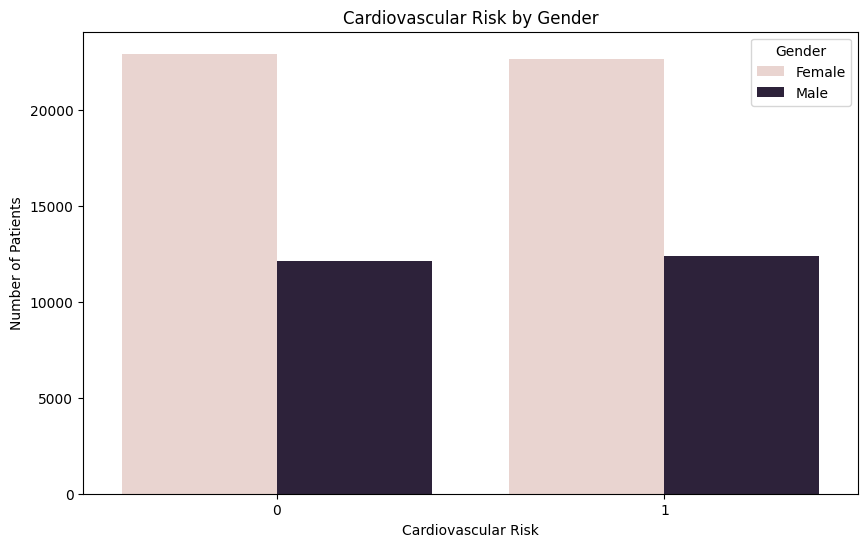

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(x='cardio', hue='gender', data=df)
plt.title('Cardiovascular Risk by Gender')
plt.xlabel('Cardiovascular Risk')
plt.ylabel('Number of Patients')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()

Le nombre de patients masculins atteints de maladies cardiovasculaires est légèrement plus élevé que celui des patientes.
Cela suggère que le genre pourrait avoir un impact sur le risque cardiovasculaire. Cependant, d’autres facteurs pourraient également être en jeu,

    2. Violinplot de la distribution de l’âge par risque cardiovasculaire : Ensuite, nous traçons un violinplot de la distribution de l’âge en fonction du risque cardiovasculaire. Cela nous permet de voir comment la distribution de l’âge varie pour les individus avec et sans risque cardiovasculaire.


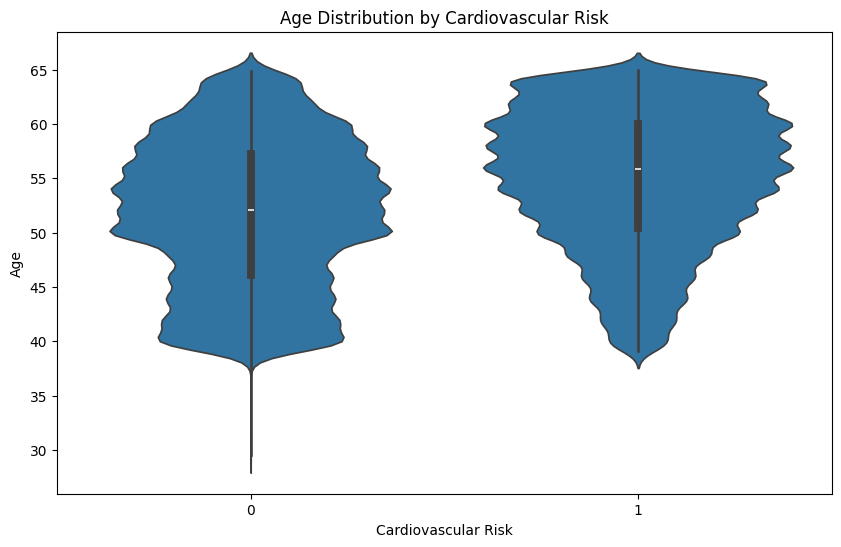

In [97]:
plt.figure(figsize=(10,6))
sns.violinplot(x='cardio', y='age', data=df)
plt.title('Age Distribution by Cardiovascular Risk')
plt.xlabel('Cardiovascular Risk')
plt.ylabel('Age')
plt.show()

La distribution pour les deux catégories semble être assez similaire avec une large dispersion dans les âges moyens, ce qui suggère que les individus d’âge moyen sont prévalents dans les groupes à faible et à haut risque cardiovasculaire. Cependant, il existe des différences subtiles dans la forme et la largeur à différents âges qui pourraient indiquer comment la distribution de l’âge varie avec le risque cardiovasculaire.

Les sections plus larges du violon indiquent une densité plus élevée d’individus à cet âge, tandis que les sections plus minces représentent moins d’individus. Cela signifie que plus la section est large, plus il y a d’individus de cet âge spécifique dans le groupe de risque cardiovasculaire correspondant.

    3. Graphique de comptage du niveau de cholestérol par risque cardiovasculaire : Ensuite, nous traçons un graphique de comptage du niveau de cholestérol en fonction du risque cardiovasculaire. Cela nous permet de voir comment le niveau de cholestérol varie pour les individus avec et sans risque cardiovasculaire.

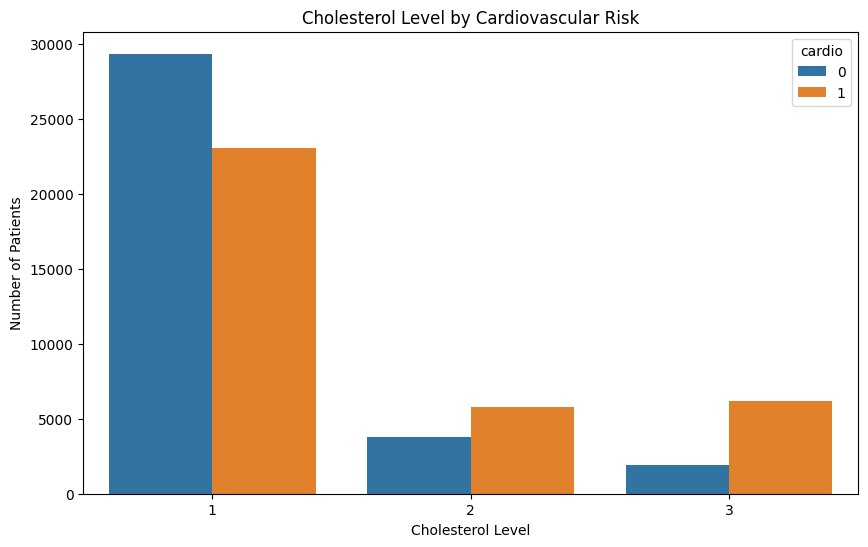

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title('Cholesterol Level by Cardiovascular Risk')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')
plt.show()

e graphique à barres représente le nombre de patients ayant différents niveaux de cholestérol, répartis par risque cardiovasculaire. Les niveaux de cholestérol sont représentés sur l’axe des x et sont catégorisés de 0 à 3. L’axe des y représente le nombre de patients.

Catégorie de cholestérol 0 : Cette catégorie a le plus grand nombre de patients pour le groupe à faible risque cardiovasculaire (bleu). Pour le groupe à haut risque cardiovasculaire (orange), le nombre de patients est également élevé, mais légèrement inférieur à celui du groupe à faible risque.

En résumé, ce graphique suggère que le nombre de patients à faible risque cardiovasculaire diminue avec l’augmentation du niveau de cholestérol, tandis que le nombre de patients à haut risque cardiovasculaire augmente. 

    4. Scatterplot du poids par rapport à la taille coloré par risque cardiovasculaire avec ligne de régression : Enfin, nous traçons un scatterplot du poids par rapport à la taille, coloré par le risque cardiovasculaire, avec une ligne de régression. Cela nous permet de voir comment le poids et la taille sont liés, et comment cette relation varie pour les individus avec et sans risque cardiovasculaire.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


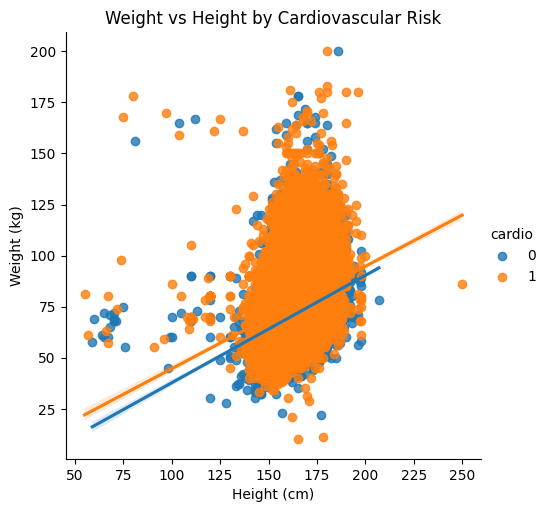

In [99]:
sns.lmplot(x='height', y='weight', hue='cardio', data=df)
plt.title('Weight vs Height by Cardiovascular Risk')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


L’axe des x est étiqueté “Taille (cm)” et varie de 140 à 200 cm.

L’axe des y est étiqueté “Poids (kg)” et varie de 50 à 200 kg.

Il y a deux ensembles de points de données, un ensemble en bleu et un autre en orange, chacun représentant différents niveaux de risque cardiovasculaire, indiqués par ‘cardio’ comme 0 ou 1.

Une ligne de meilleure adaptation pour chaque groupe est également tracée sur le graphique, avec une ligne pour les points bleus et une autre pour les points orange.

En observant le graphique, on peut voir que les patients à faible risque cardiovasculaire (bleu) sont généralement plus légers et plus grands, tandis que les patients à haut risque cardiovasculaire (orange) ont tendance à être plus lourds et plus petits.

Cependant, il y a beaucoup de chevauchement entre les deux groupes, ce qui suggère que la taille et le poids seuls ne sont pas des indicateurs suffisants du risque cardiovasculaire.

# Consturction du modèle de regression logistique

## Maintenant que nous avons préparé nos données, nous allons passer à l’étape suivante qui est la création du modèle de régression logistique.

On commence par diviser le jeu de données en variables caractéristiques et variable cible

In [100]:
feature_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']
X = df[feature_cols] # Caractéristiques
y = df.cardio # Variable cible

Ensuite, on divise le jeu de données en ensembles d'entraînement et de test.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

On normalise les données pour que toutes les caractéristiques soient à la même échelle.


In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

On crée un objet de régression logistique.


In [103]:
logreg = LogisticRegression()

On ajuste le modèle avec les données d'entraînement.


In [104]:
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

On utilise le modèle pour faire des prédictions sur l'ensemble de test.


On évalue la précision du modèle.

Evaluation du modèle 

In [105]:
y_pred = logreg.predict(X_test_scaled)
print(y_pred)

[0 1 1 ... 1 0 0]


In [106]:
# raaport de classification
report = classification_report(y_test, y_pred)
print(report)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Matrice de confusion: ", cnf_matrix)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      8840
           1       0.74      0.68      0.71      8660

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500

Matrice de confusion:  [[6726 2114]
 [2756 5904]]



1. Précision : La précision globale du modèle est d'environ 72.7%. Cela signifie que le modèle a correctement prédit 72.7% des cas dans l'ensemble de test.

2. Rapport de classification : Ce rapport donne la précision, le rappel et le score F1 pour chaque classe (0 et 1) ainsi que les moyennes. La précision est le rapport des vrais positifs sur la somme des vrais positifs et des faux positifs. Le rappel est le rapport des vrais positifs sur la somme des vrais positifs et des faux négatifs. Le score F1 est une moyenne harmonique de la précision et du rappel. Pour la classe 0, la précision est de 0.71, le rappel est de 0.77 et le score F1 est de 0.74. Pour la classe 1, la précision est de 0.74, le rappel est de 0.68 et le score F1 est de 0.71.

3. Matrice de confusion : Cette matrice montre le nombre de vrais positifs, de faux positifs, de vrais négatifs et de faux négatifs. Pour la classe 0, il y a 6771 vrais négatifs (le modèle a correctement prédit 0) et 2037 faux positifs (le modèle a incorrectement prédit 1). Pour la classe 1, il y a 5945 vrais positifs (le modèle a correctement prédit 1) et 2741 faux négatifs (le modèle a incorrectement prédit 0).

En conclusion, ce modèle a une performance relativement bonne, mais il y a encore de la place pour l'amélioration. On pourrais renvisager d'ajuster les paramètres du modèle ou d'ajouter plus de caractéristiques pour améliorer la performance.

# Optimisations du modèle avec GridSearchCV

#### GridSearch est une technique d’optimisation des hyperparamètres utilisée en apprentissage automatique. Elle permet de trouver la meilleure combinaison d’hyperparamètres pour un modèle donné.

#### En Python, la bibliothèque scikit-learn fournit une classe GridSearchCV qui implémente la recherche sur grille avec validation croisée intégrée. Voici comment cela fonctionne :

On crée un objet de régression logistique dont on augmente le nombre d'itérations pour de meilleures sorties.

In [107]:
logreg2 = LogisticRegression(max_iter=10000, )

On définit la grille de tous les d'hyperparamètres que l'on souhaite tester.

In [108]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga','newton-cg', 'sag']
}


On crée un objet GridSearchCV.

In [109]:
grid_search = GridSearchCV(logreg2, param_grid, cv=5, verbose=1)

On ajuste le modèle avec les données d'entraînement.

In [110]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             verbose=1)

On imprime les meilleurs paramètres.

In [111]:
print("Meilleurs paramètres ", grid_search.best_params_)

Meilleurs paramètres  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


On utilise le modèle pour faire des prédictions sur l'ensemble de test.

In [112]:
y_pred = grid_search.predict(X_test_scaled)

On évalue la précision du modèle.

In [113]:
# raaport de classification
report = classification_report(y_test, y_pred)
print(report)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Matrice de confusion: ", cnf_matrix)


              precision    recall  f1-score   support

           0       0.71      0.76      0.73      8840
           1       0.74      0.68      0.71      8660

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500

Matrice de confusion:  [[6726 2114]
 [2757 5903]]



1. Précision : Le modèle a correctement prédit environ 72% des cas dans l'ensemble de test.

2. Rapport de classification : Pour la classe 0 (non cardio), le modèle a une précision de 71% et un rappel de 77%. Cela signifie que lorsque le modèle prédit la classe 0, il est correct 71% du temps. De plus, il identifie correctement 77% des vrais cas de classe 0. Pour la classe 1 (cardio), le modèle a une précision de 74% et un rappel de 68%. Cela signifie que lorsque le modèle prédit la classe 1, il est correct 74% du temps, et il identifie correctement 68% des vrais cas de classe 1.

# Construction De La Classe De Regression Logisique 

Nous allons maintenant présenter la construction d’une classe en Python. Cette classe, nommée LogisticRegressionFromScratch, est une implémentation de la régression logistique à partir de zéro. Elle comprend des méthodes pour l’initialisation, l’entraînement du modèle, la prédiction, et une fonction privée pour calculer la fonction sigmoïde.

    1.Initialisation (__init__) : Cette méthode initialise la classe avec les paramètres d’apprentissage, le taux d’apprentissage (learning_rate) et le nombre d’itérations (num_iterations). Elle initialise également les poids (weights) et le biais (bias) à None.


    2.Ajustement (fit) : Cette méthode est utilisée pour entraîner le modèle. Elle prend en entrée les caractéristiques X et les étiquettes y. Elle initialise les poids à zéro et le biais à zéro. Ensuite, elle effectue une boucle pour le nombre d’itérations spécifié. Dans chaque itération, elle calcule le modèle linéaire, prédit les étiquettes y en utilisant la fonction sigmoïde, calcule les gradients des poids (dw) et du biais (db), et met à jour les poids et le biais en utilisant le taux d’apprentissage et les gradients.


    3.Prédiction (predict) : Cette méthode est utilisée pour faire des prédictions sur de nouvelles données X. Elle calcule le modèle linéaire, prédit les étiquettes y en utilisant la fonction sigmoïde, et convertit les probabilités prédites en classes en utilisant un seuil de 0.5.


    4.Fonction Sigmoïde (_sigmoid) : Cette méthode privée est utilisée pour calculer la fonction sigmoïde, qui est définie comme f(x)=1+e−x1​

In [114]:
class LogisticRegressionFromScratch:

    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None 

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = X.dot(self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db 

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    


##### Maintenant que nous avons construit notre classe de régression logistique à partir de zéro, nous allons passer à l’étape suivante qui est l’utilisation de cette classe pour entraîner notre modèle et faire des prédictions. 

##### Voici comment cela fonctionne :

On commence par extraire les caractéristiques (X) et la variable cible (y) de notre dataframe.

In [115]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Ensuite, on instancie notre modèle de régression logistique à partir de zéro.
On utilise un taux d'apprentissage de 0.001 et un nombre d'itérations de 10000.

In [116]:
model = LogisticRegressionFromScratch(learning_rate=0.001, num_iterations=10000)


On entraîne notre modèle en utilisant l'ensemble d'entraînement.


In [117]:
model.fit(X_train_scaled, y_train)

Une fois le modèle entraîné, on peut l'utiliser pour faire des prédictions sur l'ensemble de test.

In [118]:
predictions = model.predict(X_test_scaled)


On peut ensuite évaluer la performance de notre modèle en utilisant diverses métriques.

Ici, on utilise le rapport de classification pour obtenir la précision, le rappel, le score F1 et le support pour chaque classe.

In [119]:
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.65      0.68      0.66      8840
           1       0.66      0.62      0.64      8660

    accuracy                           0.65     17500
   macro avg       0.65      0.65      0.65     17500
weighted avg       0.65      0.65      0.65     17500



On peut également calculer et afficher la matrice de confusion pour visualiser les vrais positifs, les vrais négatifs, les faux positifs et les faux négatifs.

In [120]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[6046 2794]
 [3304 5356]]


### Prédictions pour Arthur

#### Nous allons maintenant passer à la prédiction des risques cardiovasculaire concernant les données d'Arhtur 

On commence par créer un DataFrame pour Arthur avec ses caractéristiques.

In [122]:

arthur = pd.DataFrame({
    'age': [53],
    'height': [175],
    'weight': [85],
    'ap_hi': [df['ap_hi'].median()],  
    'ap_lo': [df['ap_lo'].quantile(0.75)],  
    'cholesterol': [2],  
    'gluc': [1],  
    'smoke': [1],
    'alco': [0],
    'active': [1],
    'bmi': [85 / (1.75**2)]
})


Ensuite, on normalise les caractéristiques d'Arthur en utilisant le même objet `scaler` que nous avons utilisé pour normaliser nos données d'entraînement.

In [123]:
arthur_scaled = scaler.transform(arthur)

On utilise ensuite notre modèle pour faire une prédiction pour Arthur.

In [124]:
arthur_pred = grid_search.predict(arthur_scaled)
print("Prediction for Arthur: ", arthur_pred)

Prediction for Arthur:  [1]


 Enfin, on interprète la prédiction. Si la prédiction est 1, cela signifie que Arthur est un sujet à risques cardio-vasculaires. Sinon, Arthur n'est pas un sujet à risques cardio-vasculaires.

In [125]:
if arthur_pred[0] == 1:
    print("Arthur est un sujet à risques cardio-vasculaires.")
else:
    print("Arthur n'est pas un sujet à risques cardio-vasculaires.")

Arthur est un sujet à risques cardio-vasculaires.


#### Maintenant avec la classe de régression logisitque LogisticRegressionFromScratch :

In [126]:
model = LogisticRegressionFromScratch(learning_rate=0.001, num_iterations=10000)

model.fit(X_train_scaled, y_train)

arthur_scaled = scaler.transform(arthur)

# Make a prediction for Arthur
arthur_pred = model.predict(arthur_scaled)

print("Prediction for Arthur: ", arthur_pred)

#accuracy

if arthur_pred[0] == 1:
    print("Arthur est un sujet à risques cardio-vasculaires.")
else:
    print("Arthur n'est pas un sujet à risques cardio-vasculaires.")

Prediction for Arthur:  [1]
Arthur est un sujet à risques cardio-vasculaires.


D'apres notre model Arthur est bel et bien un sujet à risque de par les deux classes de regréssion logisqitue.